In [1]:
import pandas as pd

In [28]:
data = pd.read_csv("../data/raw/training.csv")

In [43]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01, random_state=42)

In [44]:
model.fit(data[["1"]].values.reshape(-1, 1))

IsolationForest(contamination=0.01, random_state=42)

In [45]:
df = pd.DataFrame()
df["x"] = data["1"]
df["anomalies"] = model.predict(data[["1"]])

/Users/ansh/anomaly_detection/.env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [46]:
df.head(20)

,x,anomalies
0,-0.115983,1
1,0.287260,1
2,0.606560,1
3,0.555845,1
4,1.028938,1
5,0.876613,1
6,0.589736,1
7,1.111999,1
8,0.083588,1
9,1.085240,1


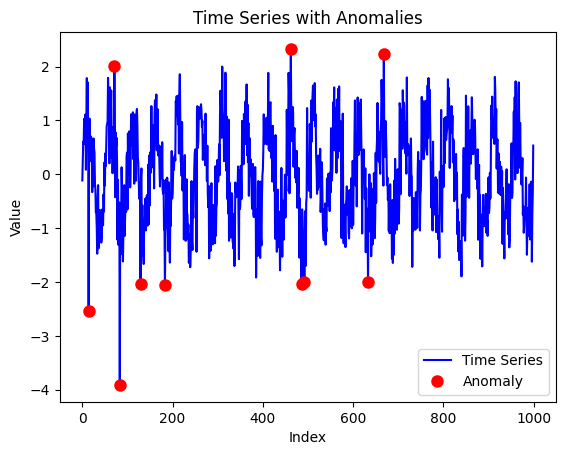

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_anomalies(data):
    x = data['x']
    anomalies = data['anomalies']

    fig, ax = plt.subplots()
    ax.plot(x, color='blue', label='Time Series')

    anomaly_indices = anomalies[anomalies == -1].index
    for idx in anomaly_indices:
        ax.plot(idx, x[idx], 'ro', markerfacecolor='red', markersize=8, label='Anomaly' if idx == anomaly_indices[0] else "")

    ax.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Time Series with Anomalies')
    plt.show()

plot_anomalies(df)


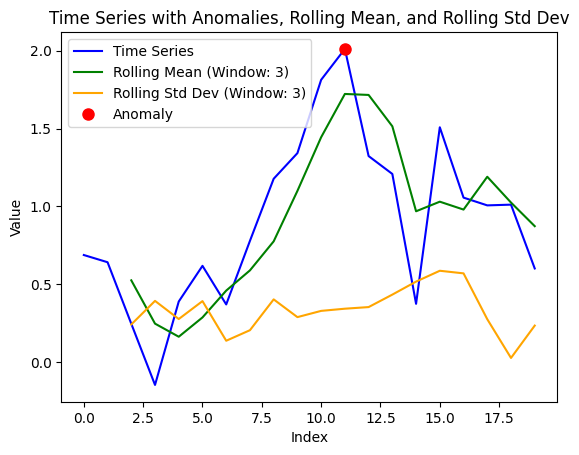

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_anomalies(data, window_size=5):
    x = data['x']
    anomalies = data['anomalies']
    rolling_mean = x.rolling(window=window_size).mean()
    rolling_std = x.rolling(window=window_size).std()

    fig, ax = plt.subplots()
    ax.plot(x, color='blue', label='Time Series')
    ax.plot(rolling_mean, color='green', label=f'Rolling Mean (Window: {window_size})')
    ax.plot(rolling_std, color='orange', label=f'Rolling Std Dev (Window: {window_size})')

    anomaly_indices = anomalies[anomalies == -1].index
    for idx in anomaly_indices:
        ax.plot(idx, x[idx], 'ro', markerfacecolor='red', markersize=8, label='Anomaly' if idx == anomaly_indices[0] else "")

    ax.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Time Series with Anomalies, Rolling Mean, and Rolling Std Dev')
    plt.show()

# Example usage
data = pd.DataFrame({
    'x': [0.688241, 0.641996, 0.246953, -0.145688, 0.389717, 0.618756, 0.371015, 0.779209, 1.177866, 1.342337, 1.813000, 2.011349, 1.323510, 1.208639, 0.375063, 1.508291, 1.056712, 1.006944, 1.011624, 0.601969],
    'anomalies': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]
})

plot_anomalies(data, window_size=3)


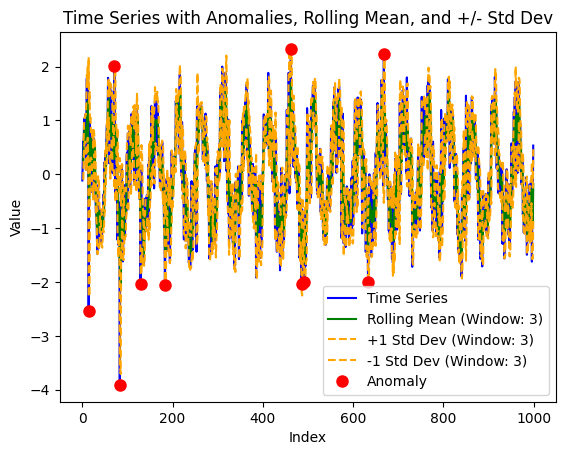

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_anomalies(data, window_size=5):
    x = data['x']
    anomalies = data['anomalies']
    rolling_mean = x.rolling(window=window_size).mean()
    rolling_std = x.rolling(window=window_size).std()
    upper_std = rolling_mean + rolling_std
    lower_std = rolling_mean - rolling_std

    fig, ax = plt.subplots()
    ax.plot(x, color='blue', label='Time Series')
    ax.plot(rolling_mean, color='green', label=f'Rolling Mean (Window: {window_size})')
    ax.plot(upper_std, color='orange', linestyle='--', label=f'+1 Std Dev (Window: {window_size})')
    ax.plot(lower_std, color='orange', linestyle='--', label=f'-1 Std Dev (Window: {window_size})')

    ax.fill_between(data.index, lower_std, upper_std, color='orange', alpha=0.1)

    anomaly_indices = anomalies[anomalies == -1].index
    for idx in anomaly_indices:
        ax.plot(idx, x[idx], 'ro', markerfacecolor='red', markersize=8, label='Anomaly' if idx == anomaly_indices[0] else "")

    ax.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Time Series with Anomalies, Rolling Mean, and +/- Std Dev')
    plt.show()

# Example usage
data = pd.DataFrame({
    'x': [0.688241, 0.641996, 0.246953, -0.145688, 0.389717, 0.618756, 0.371015, 0.779209, 1.177866, 1.342337, 1.813000, 2.011349, 1.323510, 1.208639, 0.375063, 1.508291, 1.056712, 1.006944, 1.011624, 0.601969],
    'anomalies': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]
})

plot_anomalies(df, window_size=3)


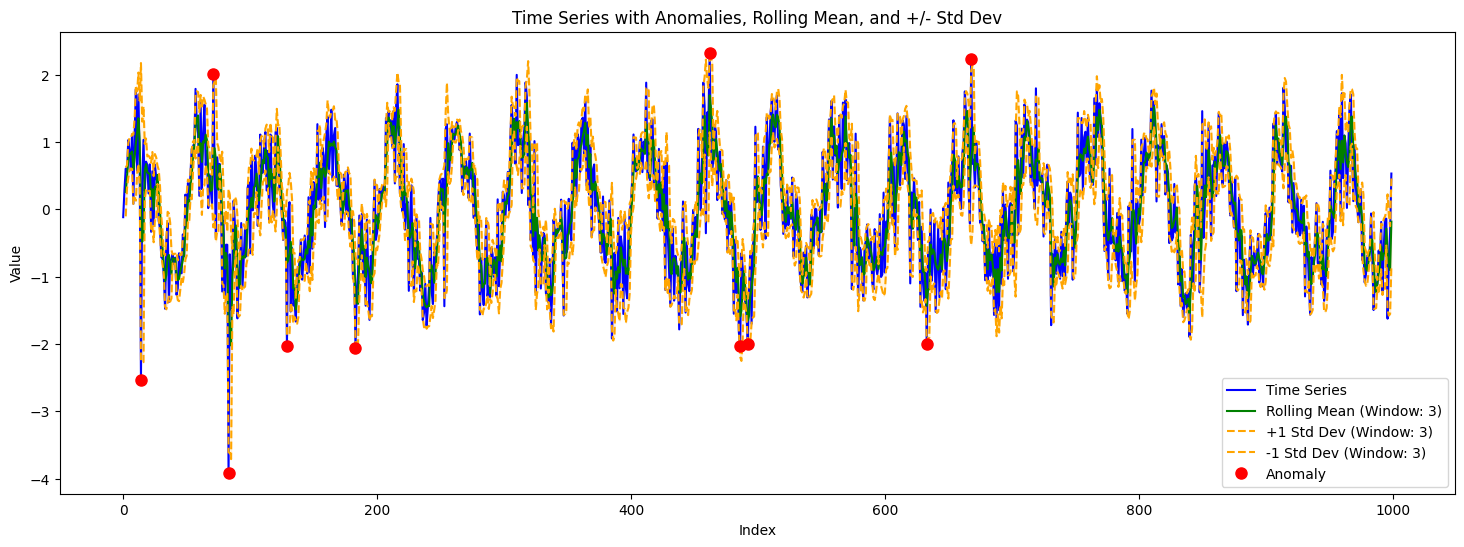

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_anomalies(data, window_size=5, width=10, height=6):
    x = data['x']
    anomalies = data['anomalies']
    rolling_mean = x.rolling(window=window_size).mean()
    rolling_std = x.rolling(window=window_size).std()
    upper_std = rolling_mean + rolling_std
    lower_std = rolling_mean - rolling_std

    fig, ax = plt.subplots(figsize=(width, height))
    ax.plot(x, color='blue', label='Time Series')
    ax.plot(rolling_mean, color='green', label=f'Rolling Mean (Window: {window_size})')
    ax.plot(upper_std, color='orange', linestyle='--', label=f'+1 Std Dev (Window: {window_size})')
    ax.plot(lower_std, color='orange', linestyle='--', label=f'-1 Std Dev (Window: {window_size})')

    ax.fill_between(data.index, lower_std, upper_std, color='orange', alpha=0.1)

    anomaly_indices = anomalies[anomalies == -1].index
    for idx in anomaly_indices:
        ax.plot(idx, x[idx], 'ro', markerfacecolor='red', markersize=8, label='Anomaly' if idx == anomaly_indices[0] else "")

    ax.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Time Series with Anomalies, Rolling Mean, and +/- Std Dev')
    plt.show()

# Example usage
data = pd.DataFrame({
    'x': [0.688241, 0.641996, 0.246953, -0.145688, 0.389717, 0.618756, 0.371015, 0.779209, 1.177866, 1.342337, 1.813000, 2.011349, 1.323510, 1.208639, 0.375063, 1.508291, 1.056712, 1.006944, 1.011624, 0.601969],
    'anomalies': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]
})

plot_anomalies(df, window_size=3, width=18, height=6)


In [11]:
import pandas as pd
data = pd.read_csv("../data/raw/training.csv")
ts = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

In [7]:
from umap import UMAP

/Users/ansh/anomaly_detection/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
embeddings = UMAP().fit_transform(data.T)

/Users/ansh/anomaly_detection/.env/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


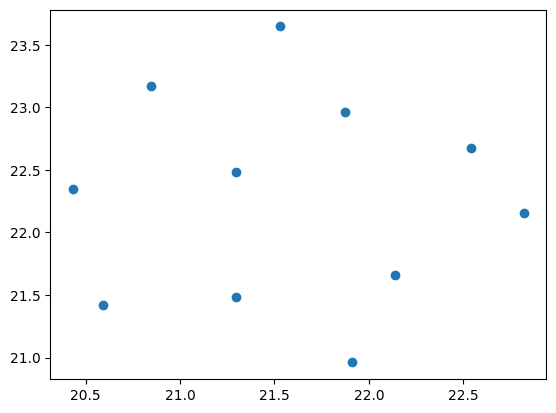

In [10]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:, 0], embeddings[:, 1])